In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset
df = pd.read_csv("/content/drive/MyDrive/data/diabetes.csv")
df.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness',
            'SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


## Comparison without pipeline


=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3000
           1       0.71      0.59      0.64      1500

    accuracy                           0.78      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.78      0.78      0.78      4500



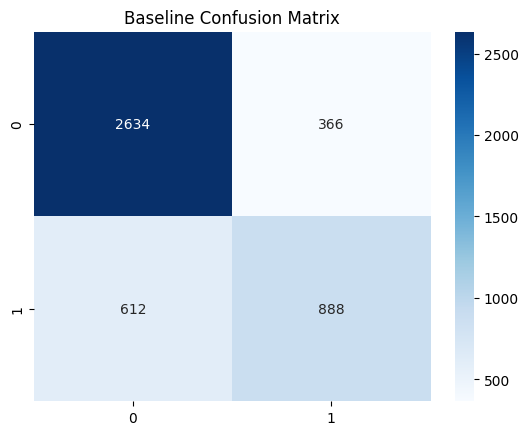

In [4]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train.fillna(0), y_train)

y_pred_base = baseline_model.predict(X_test.fillna(0))
print("=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred_base))
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Confusion Matrix")
plt.show()


## Pipeline with preprocessing & model

=== Pipeline Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3000
           1       0.71      0.59      0.64      1500

    accuracy                           0.78      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.78      0.78      0.78      4500



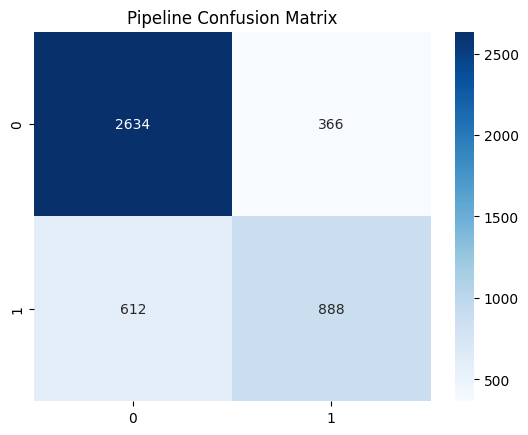

In [5]:
# Numeric pipeline (imputation + scaling)
from sklearn.preprocessing import PowerTransformer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Combine into a ColumnTransformer (all features numeric)
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, features)
])

# Final pipeline (preprocessing + logistic regression)
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Fit on train
model_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_pipe = model_pipeline.predict(X_test)

print("=== Pipeline Logistic Regression ===")
print(classification_report(y_test, y_pred_pipe))
cm_pipe = confusion_matrix(y_test, y_pred_pipe)
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='Blues')
plt.title("Pipeline Confusion Matrix")
plt.show()


## Conclusion:
### Both the basic and pipeline logistic regression models result in a similar performance (78% accuracy, similar precision/recall for each class). Including imputation/scaling in the pipeline did not notably improve the metrics, but it ensures a cleaner, more maintainable workflow.